In [1]:
from keras.datasets import mnist
#loading the mnist dataset

(train_data,train_target),(test_data,test_target)=mnist.load_data()
#spliting the dataset into training and testing

Using TensorFlow backend.


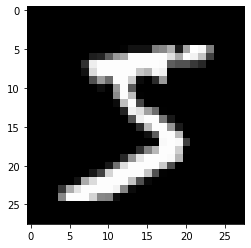

In [2]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [3]:
print(train_target[0])

5


In [4]:
train_data=train_data/255.0
test_data=test_data/255.0
#Scaling the 0-255 gray image to 0-1 (Requirement before training the Neural Network)

In [5]:
from keras.models import Sequential
#loading Sequential model from keras
from keras.layers import Dense,Flatten
#loading Flatten and Dense layers from keras

model=Sequential()
#creating a Sequential type neural network (a empty neural network, add layer by layer)
model.add(Flatten(input_shape=(28,28)))
#a flatten layer to flatten up the 28x28 input image into 784 inputs
model.add(Dense(512, activation='relu'))
#1st Hidden layer with 512 Neurons
model.add(Dense(256, activation='relu'))
#2nd Hidden layer with 256 Neurons
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#compiling the neural network with necessary parameters

model.summary()
#neural network architecture and parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils import np_utils


train_target=np_utils.to_categorical(train_target)
test_target=np_utils.to_categorical(test_target)
#convering the labels into a categorical representation


print(train_target[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
model.fit(train_data,train_target,epochs=10,validation_split=0.2)
#training the neural network for 20 epochs

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 244us/step - loss: 0.2058 - accuracy: 0.9375 - val_loss: 0.1352 - val_accuracy: 0.9605
Epoch 2/10
48000/48000 [==============================] - 14s 293us/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.0921 - val_accuracy: 0.9728
Epoch 3/10
48000/48000 [==============================] - 14s 287us/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.1041 - val_accuracy: 0.9702
Epoch 4/10
48000/48000 [==============================] - 14s 283us/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.0940 - val_accuracy: 0.9749
Epoch 5/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0987 - val_accuracy: 0.9728
Epoch 6/10
48000/48000 [==============================] - 15s 303us/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0978 - val_accuracy: 0.9771
Epoch 7/10
48000/48000 [==============================] 

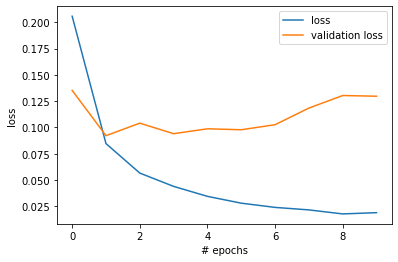

In [8]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()
#visualizing the loss

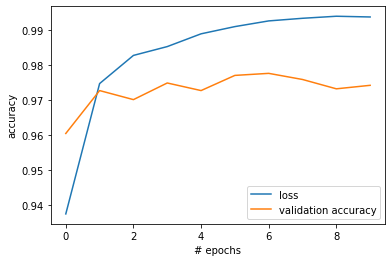

In [9]:

plt.plot(model.history.history['accuracy'],label='loss')
plt.plot(model.history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()
#visualizing the accuracy

In [10]:
print(model.evaluate(test_data,test_target))

10000/10000 [==============================] - 0s 44us/step
[0.09424253231410766, 0.9782999753952026]


In [11]:
results=model.predict(test_data)
print(results[:10])
#testing and getting results using unseen data

[[1.10085643e-15 3.10367364e-17 1.11298937e-12 2.06243537e-13
  1.94442794e-20 1.32145088e-19 7.25758245e-25 1.00000000e+00
  3.71703468e-17 3.21099159e-12]
 [2.19526419e-19 7.64273089e-10 1.00000000e+00 2.52161361e-17
  1.08633089e-22 1.24301097e-23 9.13357581e-20 9.29754152e-18
  3.76571658e-17 9.31426925e-24]
 [2.23697172e-10 1.00000000e+00 3.61568020e-08 1.00481096e-14
  5.58511681e-09 1.61993682e-12 1.23167814e-08 1.46480850e-09
  3.63292756e-08 1.17441647e-13]
 [1.00000000e+00 5.40139358e-15 1.51477035e-08 8.32417563e-14
  3.67521985e-11 1.27269858e-13 1.54887636e-09 1.55351621e-12
  3.71150419e-12 2.84321211e-09]
 [3.88327738e-12 1.72283993e-11 1.07345798e-14 5.54720660e-16
  1.00000000e+00 6.80802647e-15 8.38697601e-12 1.94791809e-08
  4.63358085e-13 4.39257377e-08]
 [6.38463804e-12 1.00000000e+00 1.79278174e-12 2.99047199e-17
  6.86302348e-10 3.74310424e-16 1.47300210e-11 8.00161881e-10
  1.86053506e-09 3.36436002e-15]
 [6.91380055e-15 1.85965609e-12 2.71225669e-13 3.23755752e

In [12]:
import numpy as np
results=np.argmax(results,axis=1)
#scaling it using argmax

In [13]:
print(test_target[:10])
print(results[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9]


In [14]:
model.save_weights('FFNN-MNIST.h5')